# FAKE JOB POSTINGS

The given dataset contains a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs <br>


## Objectives

1)Find out which industry has the highest number of fake job postings. <br>

2)Graphically display my result

Import libaries and convert the csv file to a DataFrame

In [5]:
#import pandas and other libaries under their ususal alias
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib
from matplotlib import pyplot as plt
 



In [2]:
#csv to dataframe
df_fake_job_postings=pd.read_csv("fake_job_postings.csv")

In [3]:
#check number of rows and columns
df_fake_job_postings.shape

(17880, 18)

This dataset contains 17880 rows and 18 columns

In [ ]:
#Preview dataset
df_fake_job_postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Clean the data

In [4]:
#Find how many null values there are for each column
df_fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
#check for duplicate rows 
df_fake_job_postings.duplicated().sum()

0

In [12]:
#drop rows with null value
df_fake_job_postings.dropna(axis=0, how='any', inplace=True)

In [13]:
#Find how many null values there are for each column
df_fake_job_postings.isnull().sum()




job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Industry with the highest number of fake job postings.

In [18]:
#select the rows that are fake job postings
df_industry=df_fake_job_postings[df_fake_job_postings['fraudulent']==1]
df_industry['industry'].value_counts (sort = True)

Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Management Consulting                    3
Retail                                   3
Insurance                                2
Telecommunications                       2
Human Resources                          2
Transportation/Trucking/Railroad         2
Construction                             1
Security and Investigations              1
Warehousing                              1
Logistics and Supply Chain               1
Accounting                               1
Information Services                     1
Mechanical or Industrial Engineering     1
Computer Networking                      1
Name: industry, dtype: int64

In [34]:
# create a new dataframe by grouping and getting the sum of fraudulent job postings by industry
df_highestindustry=df_fake_job_postings.groupby('industry' ,as_index=False)['fraudulent'].sum()
df_highestindustry.head(21)

,industry,fraudulent
0,Accounting,1
1,Apparel & Fashion,0
2,Automotive,0
3,Aviation & Aerospace,0
4,Banking,0
5,Biotechnology,0
6,Civil Engineering,0
7,Commercial Real Estate,0
8,Computer & Network Security,5
9,Computer Games,0


## Display results graphically

Text(0, 0.5, 'Fraudulent')

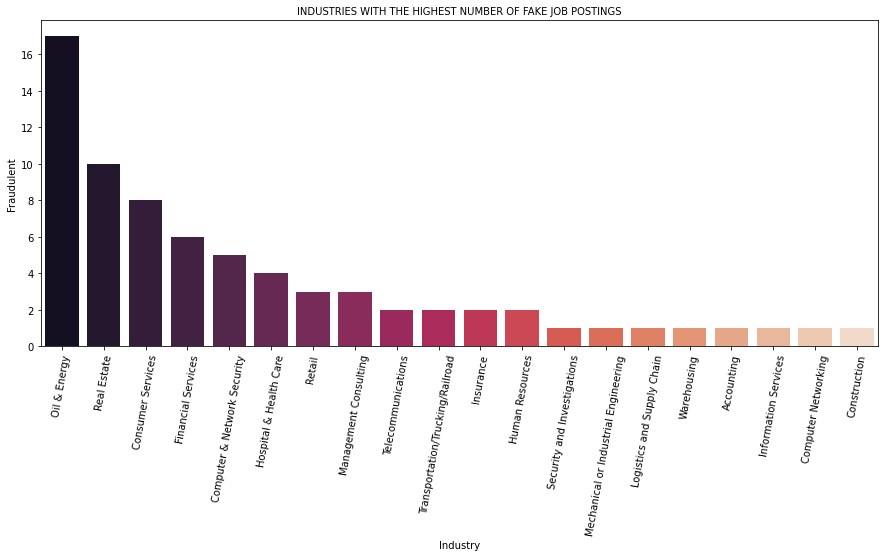

In [49]:
#visualize data using seaborn
#bar plot
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(x='industry', y='fraudulent', data=df_highestindustry.sort_values('fraudulent', ascending=False).head(20), palette='rocket')
ax.tick_params(axis='x', labelrotation=80)
ax.set_title('INDUSTRIES WITH THE HIGHEST NUMBER OF FAKE JOB POSTINGS', fontsize=10);
plt.xlabel('Industry')
plt.ylabel('Fraudulent')


The oil and energy industry has the highest number of fraudulent job postings, after cleaning and visualizing our data.